# Tópico 1 - Diferenças entre o Random Forest e o AdaBoost

O Random Forest e o AdaBoost são dois algoritmos populares de aprendizado de máquina que pertencem à categoria de algoritmos de conjunto (ensemble learning). Embora ambos sejam métodos de ensemble, existem diferenças significativas entre eles. Aqui estão cinco diferenças entre o Random Forest e o AdaBoost:

### 1. Algoritmo base:
- **Random Forest:** O Random Forest é baseado em um conjunto de árvores de decisão. Cada árvore é construída independentemente usando uma amostra aleatória do conjunto de dados de treinamento.
- **AdaBoost:** O AdaBoost (Adaptive Boosting) é baseado em um conjunto de classificadores fracos, também conhecidos como "weak learners". Esses classificadores fracos são combinados para formar um classificador forte.

### 2. Ponderação dos exemplos:
- **Random Forest:** No Random Forest, todos os exemplos do conjunto de treinamento têm a mesma importância durante a construção das árvores. Cada árvore é construída com uma amostra aleatória do conjunto de treinamento com substituição (bootstrap sampling).
- **AdaBoost:** No AdaBoost, cada exemplo do conjunto de treinamento é ponderado de acordo com o seu desempenho anterior. Os exemplos classificados incorretamente têm uma ponderação maior, o que os torna mais importantes nas iterações subsequentes.

### 3. Processo de construção:
- **Random Forest:** Cada árvore do Random Forest é construída independentemente, sem levar em conta as outras árvores. Cada árvore é treinada em uma amostra aleatória do conjunto de treinamento, e as previsões finais são obtidas pela média das previsões de todas as árvores.
- **AdaBoost:** No AdaBoost, as iterações são feitas de forma sequencial. Em cada iteração, um classificador fraco é treinado com base nos exemplos ponderados. Os exemplos mal classificados recebem mais peso nas iterações subsequentes.

### 4. Sensibilidade a outliers:
- **Random Forest:** O Random Forest é menos sensível a outliers no conjunto de treinamento. Como cada árvore é treinada em uma amostra aleatória com substituição, a presença de outliers em uma única árvore não afeta significativamente o modelo geral.
- **AdaBoost:** O AdaBoost pode ser mais sensível a outliers. Os exemplos mal classificados recebem mais peso nas iterações subsequentes, o que significa que outliers podem ter um impacto maior no modelo final.

### 5. Tamanho do modelo:
- **Random Forest:** O Random Forest pode produzir um modelo maior em comparação com o AdaBoost. Uma vez que cada árvore é construída independentemente, o tamanho total do modelo é a soma dos tamanhos individuais de cada árvore.
- **AdaBoost**: O AdaBoost produz um modelo menor em comparação com o Random Forest. O modelo final consiste em uma combinação ponderada dos classificadores fracos, resultando em um modelo mais compacto.

# Tópico 2 - Exemplo do AdaBoost

Exemplo de código que utiliza o AdaBoost para classificação e gera um gráfico de dispersão dos resultados

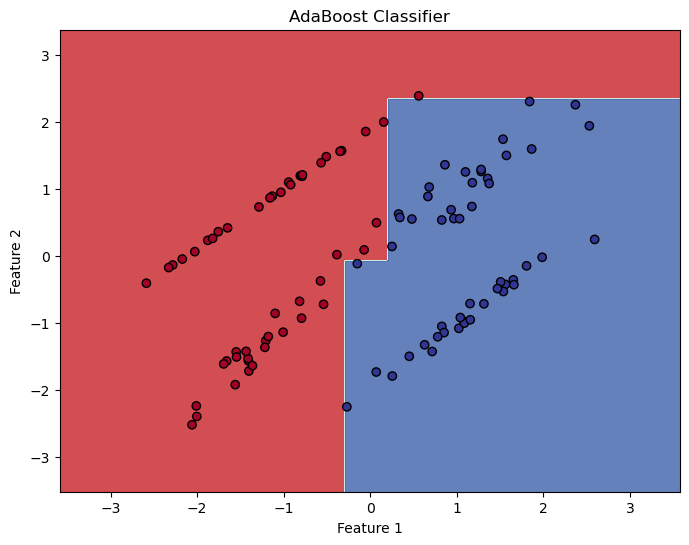

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_boost.fit(X, y)

plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('AdaBoost Classifier')
plt.show()

# Tópico 3 - Cinco hiperparâmetros importantes no AdaBoost

Existem vários hiperparâmetros que podem ser ajustados no AdaBoost para otimizar o desempenho do modelo. Aqui estão cinco hiperparâmetros importantes do AdaBoost:

### n_estimators (int)
Esse hiperparâmetro define o número de estimadores (classificadores fracos) a serem utilizados no AdaBoost. Um maior número de estimadores pode aumentar a capacidade do modelo, mas também pode aumentar o tempo de treinamento. É importante encontrar um equilíbrio entre desempenho e eficiência computacional.

### learning_rate (float)
O learning rate controla a contribuição de cada estimador no conjunto final. Valores menores de learning rate fazem com que cada estimador tenha uma contribuição menor, o que pode levar a um modelo mais conservador. Valores maiores aumentam a importância de cada estimador, o que pode levar a um modelo mais complexo e suscetível a overfitting.

### ase_estimator (object)
O base_estimator é o classificador fraco utilizado no AdaBoost. É possível utilizar diferentes classificadores fracos, como árvores de decisão, regressão logística, entre outros. A escolha do classificador fraco pode afetar o desempenho do modelo.

### algorithm (string)
O algoritmo é usado para calcular os pesos dos exemplos a cada iteração. O valor padrão é 'SAMME.R', que é uma versão otimizada do algoritmo SAMME (Stagewise Additive Modeling using a Multiclass Exponential loss function). Outra opção é 'SAMME', que usa pesos exponenciais para atualizar os exemplos.

### random_state (int ou objeto RandomState)
O random_state é usado para controlar a aleatoriedade no treinamento do modelo. Fornecer um valor fixo para random_state garante que os resultados sejam reproduzíveis. Isso é útil para fins de depuração e comparação entre diferentes configurações do modelo.

# Tópico 4 - Encontrando os melhores hiperparâmetros para o conjunto de dados load_iris

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Carregando o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target

# Definindo os hiperparâmetros para a busca em grid
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Criando o classificador SVM
svm = SVC()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(svm, parameters)

# Realizando a busca em grid
grid_search.fit(X, y)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


Neste exemplo, estamos usando o algoritmo de classificação SVM (SVC) como modelo e especificando os hiperparâmetros que queremos otimizar: **`C`**, **`gamma`** e **`kernel`**. Em seguida, criamos um objeto **`GridSearchCV`** e passamos o modelo e os hiperparâmetros para ele. Finalmente, chamamos o método **`fit`** para executar a busca em grid com o conjunto de dados **`X`** e **`y`**.

Depois que a busca em grid for concluída, o objeto **`grid_search`** terá o atributo **`best_params_`**, que contém os melhores hiperparâmetros encontrados. No exemplo acima, imprimimos os melhores hiperparâmetros encontrados na última linha.